In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#Dataset
fruit = pd.read_csv('fruits.csv')

In [3]:
#sample data
print(fruit.head())

   fruit_label fruit_name  mass  width  height  color_score
0            1      apple   192    8.4     7.3         0.55
1            1      apple   180    8.0     6.8         0.59
2            1      apple   176    7.4     7.2         0.60
3            2   mandarin    86    6.2     4.7         0.80
4            2   mandarin    84    6.0     4.6         0.79


In [4]:
#description 
print(fruit.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


In [5]:
#plotting various combinations of parameter

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


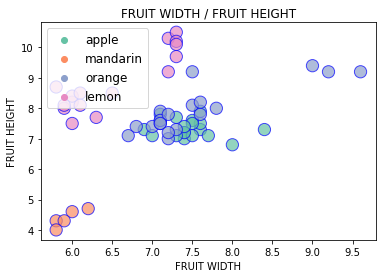

In [6]:
sns.scatterplot('width', 'height', data = fruit, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('FRUIT WIDTH / FRUIT HEIGHT')
plt.xlabel('FRUIT WIDTH')
plt.ylabel('FRUIT HEIGHT')
plt.legend(loc = 'upper left', fontsize = 12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


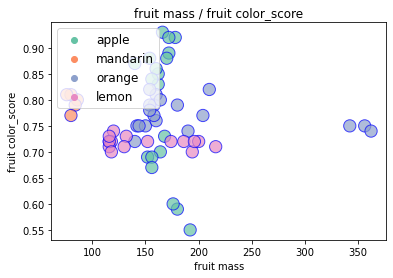

In [7]:
sns.scatterplot('mass', 'color_score', data = fruit, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('fruit mass / fruit color_score')
plt.xlabel('fruit mass')
plt.ylabel('fruit color_score')
plt.legend(loc = 'upper left', fontsize = 12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


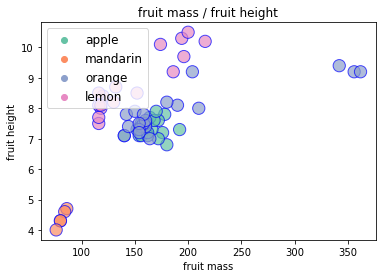

In [8]:
sns.scatterplot('mass', 'height', data = fruit, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('fruit mass / fruit height')
plt.xlabel('fruit mass')
plt.ylabel('fruit height')
plt.legend(loc = 'upper left', fontsize = 12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


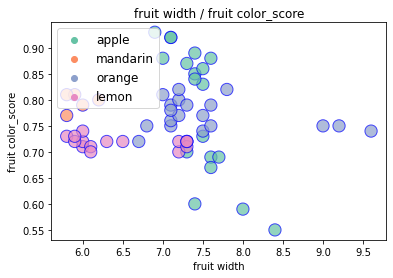

In [9]:
sns.scatterplot('width', 'color_score', data = fruit, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('fruit width / fruit color_score')
plt.xlabel('fruit width')
plt.ylabel('fruit color_score')
plt.legend(loc = 'upper left', fontsize = 12)

In [10]:
#finding the correlation amoung the parameters
print(fruit.iloc[:,1:].corr())

                 mass     width    height  color_score
mass         1.000000  0.877687  0.609571    -0.079794
width        0.877687  1.000000  0.396848    -0.076576
height       0.609571  0.396848  1.000000    -0.247047
color_score -0.079794 -0.076576 -0.247047     1.000000


In [11]:
features = ['width','color_score']
x = fruit[features]
y = fruit.iloc[:,0]

In [12]:
#splitting of dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [13]:
#standardize the training and test dataset


scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
#function to calculate euclidean distance
def euclid_dist(X1,X2):
    dist = np.sum((X1 - X2)**2)
    return np.sqrt(dist)

In [16]:
#function of knn predict

def knn_predict(x_train, x_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_pred = []

    for test_point in x_test:
        distances = []

        for train_point in x_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances and considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_pred.append(prediction)
        
    return y_pred


In [18]:
# predicting on test dataset
y_pred = knn_predict(x_train, x_test, y_train, y_test, k=3)
print(y_test)
print(y_pred)

33    3
44    4
22    1
6     2
54    4
23    1
0     1
8     1
1     1
50    4
21    1
37    3
Name: fruit_label, dtype: int64
[1, 4, 1, 2, 4, 1, 1, 1, 1, 4, 1, 3]


In [19]:
#calculating accuracy of the model built from scratch
from sklearn.metrics import accuracy_score


In [20]:
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.9166666666666666


In [26]:
r2_score(y_test,y_pred)

0.7966101694915254